# Feed-forward coordinate prediction (DualOutput)

### Imports

In [2]:
# external
import pickle

import torch.nn as nn
import torch.optim as optim
from torchsummary import summary
from torch.utils.data import Dataset, DataLoader

from prettytable import PrettyTable

# own
import common.action as action
import common.world as world
import common.plot as plot
import common.preprocess as preprocess
import common.nets as nets
import common.train as train
import common.tools as tools

/Users/mariuskaestingschaefer/miniforge3/envs/pytorch/lib/python3.8/site-packages/seaborn/rcmod.py:82: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(mpl.__version__) >= "3.0":
/Users/mariuskaestingschaefer/miniforge3/envs/pytorch/lib/python3.8/site-packages/setuptools/_distutils/version.py:351: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  other = LooseVersion(other)
/Users/mariuskaestingschaefer/miniforge3/envs/pytorch/lib/python3.8/site-packages/torch/utils/tensorboard/__init__.py:6: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if not hasattr(tensorboard, '__version__') or LooseVersion(tensorboard.__version__) < LooseVersion('1.15'):


### Load datasets

In [3]:
with open("datasets/oracle_data.pickle", "rb") as handle:
    oracle_data = pickle.load(handle)

with open("datasets/oracle_reversed_data.pickle", "rb") as handle:
    oracle_reversed_data = pickle.load(handle)

with open("datasets/oracle_random_data.pickle", "rb") as handle:
    oracle_random_data = pickle.load(handle)

with open("datasets/oracle_reversed_random_data.pickle", "rb") as handle:
    oracle_reversed_random_data = pickle.load(handle)

with open("datasets/random_data.pickle", "rb") as handle:
    random_data = pickle.load(handle)

with open("datasets/tmaze_random_reverse_data.pickle", "rb") as handle:
    tmaze_random_reverse_data = pickle.load(handle)

with open("datasets/oracle_reversed_random_data_small.pickle", "rb") as handle:
    oracle_reversed_random_data_small = pickle.load(handle)

### Preprocess data

In [4]:
data = tmaze_random_reverse_data

train_data, test_data = preprocess.split_data(data, 0.8)

# preprocess trainingset
oracle_train_data = preprocess.ObtainDataset(train_data, "observations", "positions")
oracle_test_data = preprocess.ObtainDataset(test_data, "observations", "positions")

# build dataloader (tensor format)
batch_size = 128
dataset_loader_train_data = DataLoader(
    oracle_train_data, batch_size=batch_size, shuffle=True
)
dataset_loader_test_data = DataLoader(
    oracle_test_data, batch_size=batch_size, shuffle=True
)

### Initialize models

In [5]:
pred_coordinates = nets.DualOutput()
summary(pred_coordinates, (3, 32, 32))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1            [-1, 6, 28, 28]             456
         MaxPool2d-2            [-1, 6, 14, 14]               0
            Conv2d-3           [-1, 16, 10, 10]           2,416
         MaxPool2d-4             [-1, 16, 5, 5]               0
            Linear-5                  [-1, 120]          48,120
            Linear-6                   [-1, 84]          10,164
            Linear-7                    [-1, 1]              85
            Linear-8                  [-1, 120]          48,120
            Linear-9                   [-1, 84]          10,164
           Linear-10                    [-1, 1]              85
Total params: 119,610
Trainable params: 119,610
Non-trainable params: 0
----------------------------------------------------------------
Input size (MB): 0.01
Forward/backward pass size (MB): 0.06
Params size (MB): 0.46
Estimated T

### Train model

Progress:   0%|          | 0/1000 [00:00<?, ? Episode/s]

Epoch: 1, Train Loss: 6.405, Train Acc: 31.22 %,  Test Loss: 5.549, Test Acc: 11.12 %,
Epoch: 11, Train Loss: 4.453, Train Acc: 30.03 %,  Test Loss: 4.312, Test Acc: 25.88 %,
Epoch: 21, Train Loss: 4.36, Train Acc: 25.94 %,  Test Loss: 4.313, Test Acc: 34.25 %,
Epoch: 31, Train Loss: 4.33, Train Acc: 24.69 %,  Test Loss: 4.513, Test Acc: 28.25 %,
Epoch: 41, Train Loss: 4.24, Train Acc: 26.16 %,  Test Loss: 4.228, Test Acc: 21.25 %,
Epoch: 51, Train Loss: 4.269, Train Acc: 25.88 %,  Test Loss: 4.265, Test Acc: 24.12 %,
Epoch: 61, Train Loss: 4.186, Train Acc: 24.28 %,  Test Loss: 4.026, Test Acc: 22.75 %,
Epoch: 71, Train Loss: 4.085, Train Acc: 24.94 %,  Test Loss: 4.002, Test Acc: 23.88 %,
Epoch: 81, Train Loss: 3.998, Train Acc: 25.59 %,  Test Loss: 4.004, Test Acc: 25.12 %,
Epoch: 91, Train Loss: 3.937, Train Acc: 26.12 %,  Test Loss: 4.361, Test Acc: 25.0 %,
Epoch: 101, Train Loss: 3.874, Train Acc: 26.19 %,  Test Loss: 3.999, Test Acc: 26.25 %,
Epoch: 111, Train Loss: 3.855, Train

Epoch: 931, Train Loss: 2.958, Train Acc: 30.88 %,  Test Loss: 3.023, Test Acc: 31.0 %,
Epoch: 941, Train Loss: 2.969, Train Acc: 30.84 %,  Test Loss: 3.241, Test Acc: 29.62 %,
Epoch: 951, Train Loss: 2.949, Train Acc: 30.72 %,  Test Loss: 3.01, Test Acc: 30.88 %,
Epoch: 961, Train Loss: 2.955, Train Acc: 30.78 %,  Test Loss: 3.066, Test Acc: 30.75 %,
Epoch: 971, Train Loss: 2.983, Train Acc: 30.81 %,  Test Loss: 2.816, Test Acc: 31.12 %,
Epoch: 981, Train Loss: 2.988, Train Acc: 30.75 %,  Test Loss: 3.168, Test Acc: 29.88 %,
Epoch: 991, Train Loss: 2.961, Train Acc: 30.81 %,  Test Loss: 2.939, Test Acc: 30.0 %,
Finished Training


/Users/mariuskaestingschaefer/miniforge3/envs/pytorch/lib/python3.8/site-packages/IPython/core/pylabtools.py:151: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


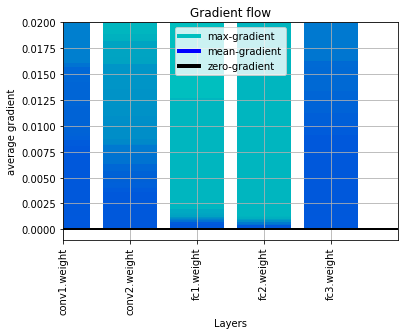

In [5]:
criterion = nn.MSELoss()  # CrossEntropyLoss
optimizer = optim.Adam(pred_coordinates.parameters(), lr=0.001)  # RMSprop, Adam, SGD

episodes = 1000
(
    pred_coordinates,
    train_loss,
    test_loss,
    train_acc,
    test_acc,
    train_dis,
    test_dis,
    train_dis_item,
    test_dis_item,
) = train.train_DualOutput(
    dataset_loader_train_data,
    dataset_loader_test_data,
    pred_coordinates,
    criterion,
    optimizer,
    episodes,
)

### Plot loss and accuracy curves

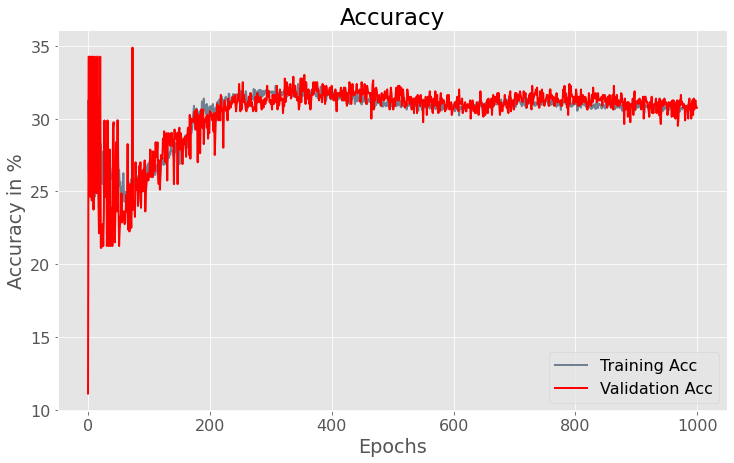

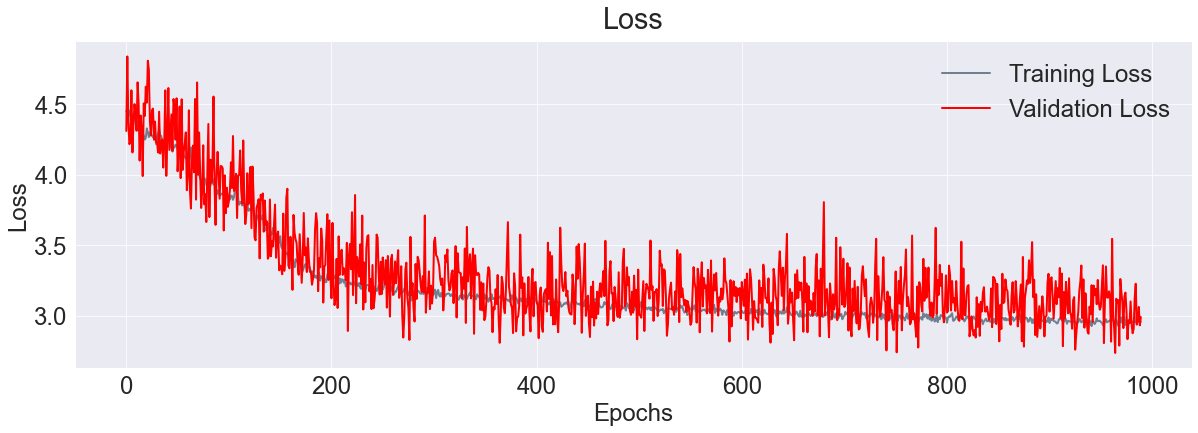

In [7]:
plot.plot_acc(train_acc, test_acc, smooth=False)

from matplotlib import pyplot as plt


def plot_losses(test_loss, train_loss):

    font = 24
    hfont = {"fontname": "Helvetica"}

    plt.rcParams["figure.figsize"] = 20, 6
    plt.rcParams["axes.titlepad"] = 13
    plt.rcParams["xtick.major.pad"] = "8"  # axis distance
    plt.rcParams["ytick.major.pad"] = "8"

    plt.rc("xtick", labelsize=font)
    plt.rc("ytick", labelsize=font)

    with plt.style.context("seaborn-darkgrid"):
        # plt.figure(figsize=(15, 6))
        # plt.style.use('ggplot')
        plt.rcParams.update({"font.size": font})
        plt.plot(test_loss, color="slategray", linewidth=2)
        plt.plot(train_loss, color="red", linewidth=2)
        plt.legend(["Training Loss", "Validation Loss"])
        plt.xlabel("Epochs")
        plt.ylabel("Loss")
        plt.title("Loss")

        plt.savefig("difficult_env_loss_epochs.pdf", bbox_inches="tight")
        plt.show()


plot_losses(train_loss[10:], test_loss[10:])

### Plot distance over episodes

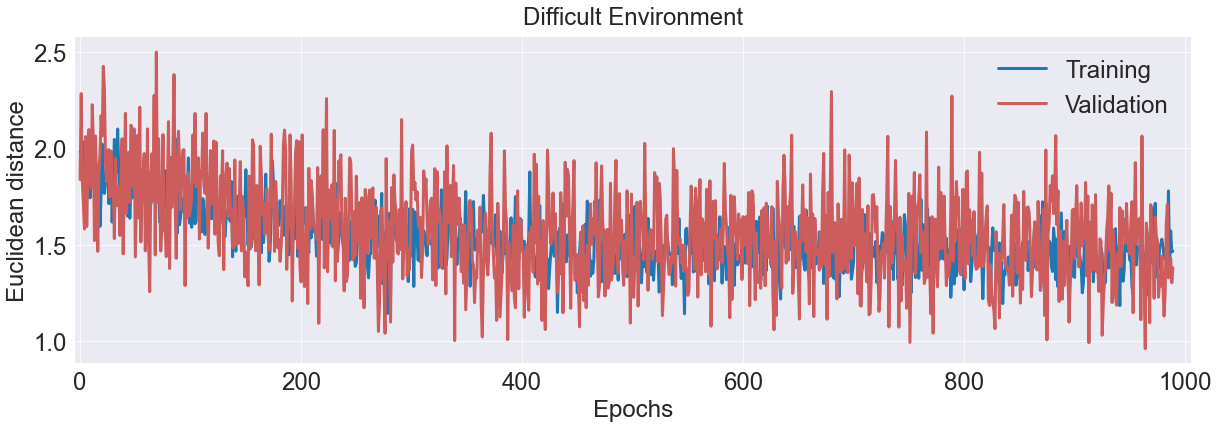

In [12]:
import numpy as np


def plot_euclidean_distance(train_dis, test_dis):

    # preprocess values

    train_dis_notensor = []
    for i in train_dis:
        i = i.detach().numpy()
        i = i.item()
        train_dis_notensor.append(i)

    test_dis_notensor = []
    for i in test_dis:
        test_dis_notensor.append(float(i))

    font = 24
    hfont = {"fontname": "Helvetica"}

    plt.rcParams["figure.figsize"] = 20, 6
    plt.rcParams["axes.titlepad"] = 13
    plt.rcParams["xtick.major.pad"] = "8"  # axis distance
    plt.rcParams["ytick.major.pad"] = "8"

    plt.rc("xtick", labelsize=font)
    plt.rc("ytick", labelsize=font)

    plt.rcParams.update({"font.size": font})

    with plt.style.context("seaborn-darkgrid"):
        plt.plot(
            train_dis_notensor[10:],
            label="Training",
            linewidth=3,
            color="tab:blue",
        )
        plt.plot(test_dis_notensor[10:], c="indianred", label="Validation", linewidth=3)
        plt.title("Difficult Environment", fontsize=font)
        plt.legend(fontsize=font)
        plt.xlabel("Epochs", fontsize=font, **hfont)
        plt.ylabel("Euclidean distance", fontsize=font, **hfont)

        plt.xlim(xmax=1005, xmin=-5)

        plt.savefig("difficult_env_euclidean_distance_epochs.pdf", bbox_inches="tight")

        plt.show()


plot_euclidean_distance(train_dis, test_dis)

### Histogram of the distribution shift (for test and training distances)

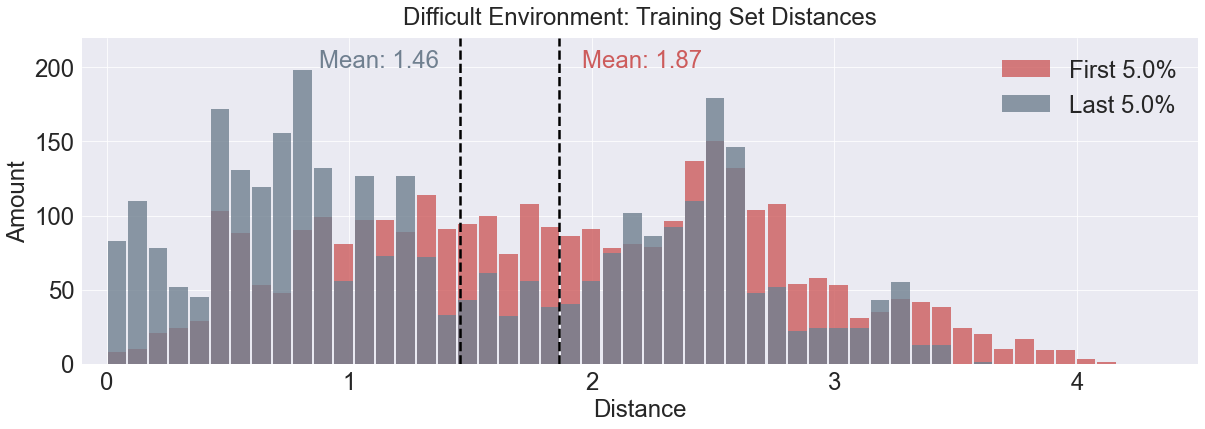

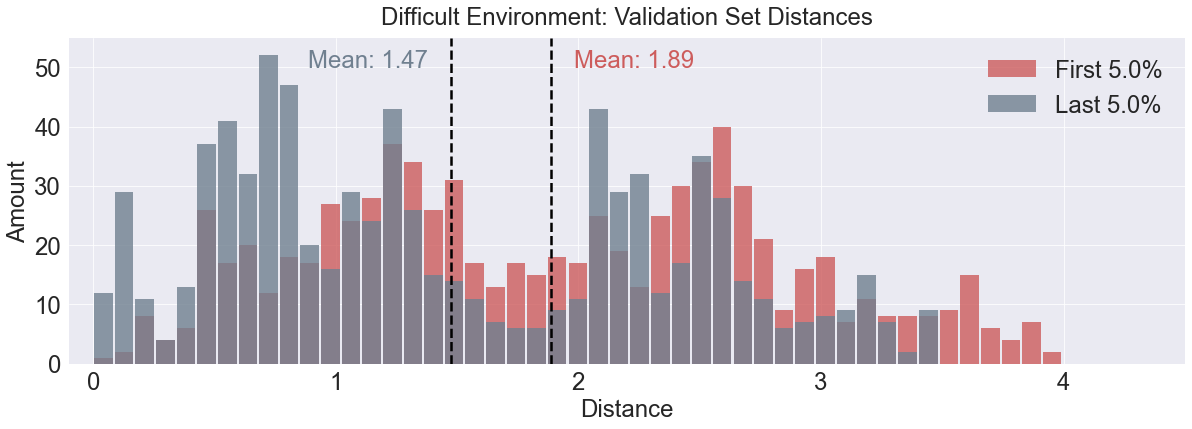

In [33]:
import statistics

percentage = 0.05


def histo_distribution_shift(test_dis_item, max_value, plot_title, savings_title, ymax):

    max_lim = 17

    def has_len(obj):
        return hasattr(obj, "__len__")

    def is_float_try(inp):
        return isinstance(inp, float) or not has_len(input)

    dis_item_notensor = []
    for item in test_dis_item:
        if len(list(test_dis_item[0].size())) == 2:
            for i in item:
                i = i.detach().numpy()
                if is_float_try(i):
                    dis_item_notensor.extend(i)
                else:
                    dis_item_notensor.append(i)
        else:
            item = item.detach().numpy()
            dis_item_notensor.extend(item)

    length = len(dis_item_notensor)

    plt.rcParams["figure.figsize"] = 20, 6

    font = 24
    hfont = {"fontname": "Helvetica"}

    plt.rcParams.update({"font.size": font})
    plt.rcParams["axes.titlepad"] = 13
    plt.rcParams["xtick.major.pad"] = "8"  # axis distance
    plt.rcParams["ytick.major.pad"] = "8"

    plt.rc("xtick", labelsize=font)
    plt.rc("ytick", labelsize=font)

    with plt.style.context("seaborn-darkgrid"):
        # first N%
        plt.hist(
            dis_item_notensor[0 : int(length * percentage)],
            bins=200,
            rwidth=0.9,
            color="indianred",
            range=(0, max_lim),
            alpha=0.8,
            label="First " + str(percentage * 100) + "%",
        )
        # last N%
        plt.hist(
            dis_item_notensor[int(length * (1 - percentage)) : length - 1],
            bins=200,
            rwidth=0.9,
            color="slategray",
            range=(0, max_lim),
            alpha=0.8,
            label="Last " + str(percentage * 100) + "%",
        )
        plt.title(plot_title, fontsize=font)
        plt.xlabel("Distance", fontsize=font)
        plt.ylabel("Amount", fontsize=font)

        # first
        mean_val_first = statistics.mean(
            dis_item_notensor[10 : int(length * percentage)]
        )
        plt.text(
            mean_val_first * 1.05,
            max_value,
            "Mean: {:.2f}".format(mean_val_first),
            fontsize=font,
            color="indianred",
        )
        plt.axvline(mean_val_first, color="k", linestyle="dashed", linewidth=2.5)

        # last
        mean_val_last = statistics.mean(
            dis_item_notensor[int(length * (1 - percentage)) : length - 1]
        )
        plt.text(
            mean_val_last * 0.6,
            max_value,
            "Mean: {:.2f}".format(mean_val_last),
            fontsize=font,
            color="slategray",
        )
        plt.axvline(mean_val_last, color="k", linestyle="dashed", linewidth=2.5)

        plt.xlim(xmax=4.5, xmin=-0.1)  # 17.5
        plt.ylim(ymax=ymax, ymin=0)

        plt.legend()

        plt.savefig(savings_title + ".pdf", bbox_inches="tight")

        plt.show()


# euclidean distance distribution for the training set for the first and last 5% of the training
histo_distribution_shift(
    train_dis_item,
    200,
    "Difficult Environment: Training Set Distances",
    "difficult_coord_pred_traing_distance",
    ymax=220,
)
histo_distribution_shift(
    test_dis_item,
    50,
    "Difficult Environment: Validation Set Distances",
    "difficult_coord_pred_validatiin_distance",
    ymax=55,
)

### Save and load models

In [11]:
# save
torch.save(net, "models/DualOutput2.pt")

# load


NameError: name 'torch' is not defined